In [1]:
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import networkx as nx
from scipy.stats import qmc
from scipy.spatial import distance
import pandas as pd
import numpy as np
import random
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
G = nx.Graph()
elist = [(1,x) for x in range(2,152)]
G.add_edges_from(elist)

In [4]:
colormap = []
colormap.append('red')
for i in range(2,152):
  colormap.append('blue')

pos = nx.spring_layout(G)

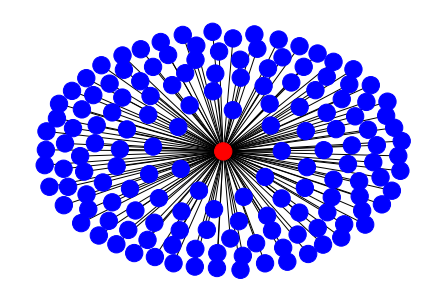

In [5]:
nx.draw(G, node_color=colormap, pos=pos)

In [6]:
len(elist)

150

In [7]:
elist = [('c', 2),('c', 3),('c', 4),('c', 5),('c', 6)]
G.add_edges_from(elist)
colormap.append('green')
pos = nx.spring_layout(G)

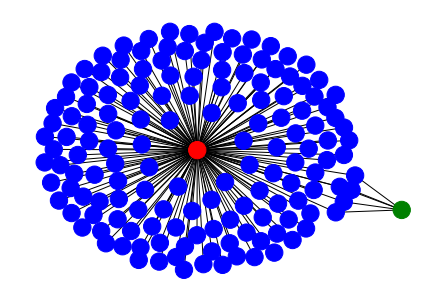

In [8]:
nx.draw(G, node_color=colormap, pos=pos)

In [9]:
lista = list(range(7,152))

In [10]:
def clon_tuple(rnd, i, aux):
  clon_list = list()
  for j in aux:
    clon_list.append(("c"+str(i), j))

  return clon_list


In [11]:
i = 1

while lista:
  rnd = random.randint(1, 5)
  aux = lista[:rnd]
  edge_list = clon_tuple(rnd, i, aux)
  G.add_edges_from(edge_list)

  del lista[:rnd]
  i += 1

In [12]:
for i in range(len([x for x in list(G.nodes) if str(x).startswith('c')])):
  colormap.append('green')

In [13]:
del colormap[-1]

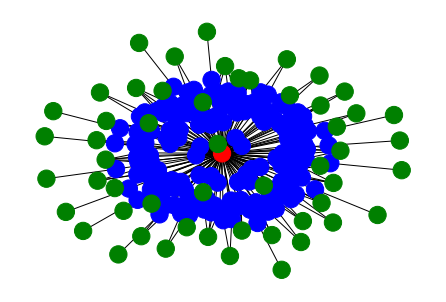

In [14]:
nx.draw(G, node_color=colormap)

In [15]:
s1 = pd.Series({k:v for k,v in nx.degree_centrality(G).items() if str(k).startswith('c')}, name='Degree')
s1 = s1.apply(lambda x:(x-s1.min())/(s1.max()-s1.min()))

s2 = pd.Series({k:v for k,v in nx.eigenvector_centrality(G).items() if str(k).startswith('c')}, name='eigenvector_centrality')
s2 = s2.apply(lambda x:(x-s2.min())/(s2.max()-s2.min()))

s3 = pd.Series({k:v for k,v in nx.closeness_centrality(G).items() if str(k).startswith('c')}, name='closeness_centrality')
s3 = s3.apply(lambda x:(x-s3.min())/(s3.max()-s3.min()))

s4 = pd.Series({k:v for k,v in nx.katz_centrality_numpy(G).items() if str(k).startswith('c')}, name='katz_centrality')
s4 = s4.apply(lambda x:(x-s4.min())/(s4.max()-s4.min()))

s5 = pd.Series({k:v for k,v in nx.betweenness_centrality(G).items() if str(k).startswith('c')}, name='betweenness_centrality')
s5 = s5.apply(lambda x:(x-s5.min())/(s5.max()-s5.min()))

s6 = pd.Series({k:v for k,v in nx.pagerank(G).items() if str(k).startswith('c')}, name='pagerank')
s6 = s6.apply(lambda x:(x-s6.min())/(s6.max()-s6.min()))


df = pd.concat([s1, s2, s3, s4, s5, s6], axis=1)
df

,Degree,eigenvector_centrality,closeness_centrality,katz_centrality,betweenness_centrality,pagerank
c,1.00,1.000000,1.000000,1.000000e+00,1.0,1.00
c1,0.75,0.744985,0.747699,7.421875e-01,0.6,0.75
c2,0.75,0.744985,0.747699,7.421875e-01,0.6,0.75
c3,0.00,0.000000,0.000000,2.583530e-15,0.0,0.00
c4,0.25,0.245051,0.247713,2.423469e-01,0.1,0.25
c5,0.00,0.000000,0.000000,0.000000e+00,0.0,0.00
c6,0.50,0.493358,0.496942,4.896907e-01,0.3,0.50
c7,0.00,0.000000,0.000000,1.130295e-15,0.0,0.00
c8,0.00,0.000000,0.000000,1.614706e-16,0.0,0.00
c9,0.50,0.493358,0.496942,4.896907e-01,0.3,0.50


In [22]:
def objective(candidate):
  return qmc.discrepancy(candidate, method='L2-star',workers=-1)

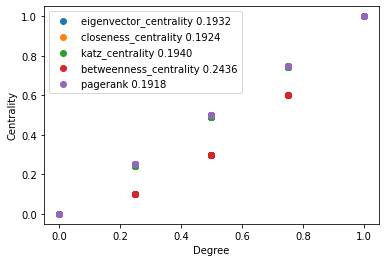

In [26]:
fig, ax = plt.subplots()
for centrality in ['eigenvector_centrality','closeness_centrality','katz_centrality','betweenness_centrality','pagerank']:
  score = f"{centrality} {objective(df[['Degree',centrality]]):.4f}"
  ax.scatter(df['Degree'], df[centrality], label=score)

ax.set_xlabel('Degree')
ax.set_ylabel('Centrality')
ax.legend()
plt.show()

In [37]:
df = pd.concat([s1, s6], axis=1)

Facebook attributes, about section:
1. Work
2. **Education**
3. Professional skills
4. Current city
5. **Hometown**
6. Places lived
7. Mobile phone
8. Website
9. Email
10. Address
11. **Birth date**
12. **Gender**
13. Interested in
14. Religious views
15. Language
16. Political views
17. Relationship
18. Family members
19. **About you (e.g., short description about yourself)**
20. Other names (e.g., nickname)
21. **Name**
22. **Photo**


Let  $P_c$  be  the  public  profile  of  a  candidate  identity  c  and  $P_v$  be  the  public  profile  of  a  victim  v.  Let  $SA_{cv}$ denote  the  number  of  the  attributes  for  which  $P_c$  and  $P_v$ have similar  values.  

1. We  define  the  attribute  similarity  of  two  profiles,  $S_{att}$, as:

\begin{align}
        S_{att}(P_c,P_v) = \frac{SA_{cv}}{\sqrt{|A_c|×|A_V|}}
    \end{align}

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where $|A_c|$  and  $|A_v|$  represents  the  number  of  attributes  in  $P_v$  and  $P_v$, respectively.

2. The similarity  between  the  FLs  in  two  identities  as  $S_{ff}$:

\begin{align}
        S_{ff}(P_c,P_v) = \frac{|MFF_{cv}|}{\sqrt{|F_c|×|F_V|}}
    \end{align}

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where $MFF_{cv}$  denotes  the  set  of  mutual  friends  common  in  the  FLs  of $P_c$ and $P_v$

3. Given a public profile $P_c$ of a candidate identity c and a public profile $P_v$ of a victim v, we define the Basic Profile Similarity of these two identities as $S_{BPS}$:

\begin{align}
        S_{bps}(P_c,P_v) = \frac{\sqrt{(kS_{att})^2(xS_{ff})^2}}{\sqrt{k^2×x^2}}
    \end{align}

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where κ and χ are the parameters to balance the effect of attribute similarity andfriend network similarity on the BPS.

In [28]:
def sim_attributes(pc,pv):

  sa = 0
  for i, j in zip(pv, pc):
    if i != 0 and i == j:
      sa +=1

  ac = abs(sum(pc))
  av = abs(sum(pv))
  
  return sa/sqrt(ac*av)

def sim_network(pc,pv):

  mff = 0
  for i, j in zip(pv, pc):
    if i != 0 and i == j:
      mff +=1

  fc = abs(sum(pc))
  fv = abs(sum(pv))
  
  return abs(mff)/sqrt(fc*fv)


def sim_profile(a_pc,a_pv,f_pc,f_pv):
  
  s_att = sim_attributes(a_pc,a_pv)
  s_ff = sim_network(f_pc,f_pv)

  return sqrt((s_att**2)*(s_ff**2))


In [29]:
a_pv = np.array([0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1])

In [38]:
am = nx.to_pandas_adjacency(G)
profile_sim = list()

for i in range(len(df)):
  a_pc = np.random.randint(2, size=21)
  profile_sim.append(sim_profile(a_pc, a_pv, am.iloc[151+i], am.iloc[0]))

In [39]:
s3 = pd.Series(profile_sim, index=df.index, name='Profile_sim')
s3 = s3.apply(lambda x:(x-s3.min())/(s3.max()-s3.min()))
df = pd.concat([df, s3], axis=1)
df

,Degree,pagerank,Profile_sim
c,1.00,1.00,0.713624
c1,0.75,0.75,0.184257
c2,0.75,0.75,1.000000
c3,0.00,0.00,0.293151
c4,0.25,0.25,0.690963
c5,0.00,0.00,0.306622
c6,0.50,0.50,0.507752
c7,0.00,0.00,0.250000
c8,0.00,0.00,0.306622
c9,0.50,0.50,0.690963


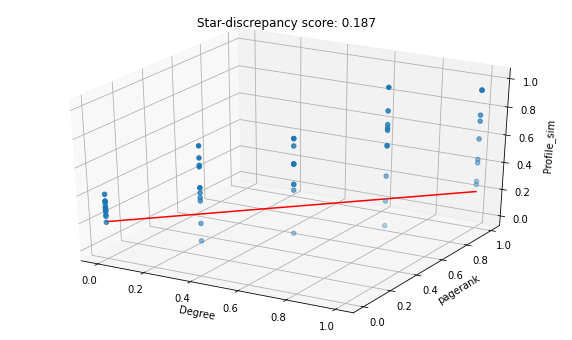

In [47]:
fig, ax = plt.subplots(1,1, figsize=(10,6), subplot_kw=dict(projection='3d'))
ax.scatter3D(df['Degree'],df['pagerank'],df['Profile_sim'])
ax.plot([0, 1], # x
        [0, 1], # y
        [0.2, 0.2], color='red') # z 
ax.set_xlabel('Degree')
ax.set_ylabel('pagerank')
ax.set_zlabel('Profile_sim')
ax.set_title(f'Star-discrepancy score: {objective(df):.3f}')
plt.show()